# Task Description:
Our goal is to train the model to recognize tooth numbers and conditions such as implants, root canals, or crowns in dental X-ray images. Dataset Overview: This dataset contains various dental X-ray images showcasing a range of conditions. The images will undergo processing using Instance Segmentation.

Dataset Link: https://universe.roboflow.com/bassem-ahmed-ouwsa/dentistry-vbril

# Instance Segmentation

Instance segmentation is a computer vision task that involves identifying and delineating individual objects within an image at the pixel level. In this task, the goal is not only to classify objects and provide bounding boxes around them (as in object detection) but also to segment each instance of an object with high precision, distinguishing between different instances of the same class

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [1]:
!pip install ultralytics

  Obtaining dependency information for ultralytics from https://files.pythonhosted.org/packages/7f/b1/7f4c14026334a6f7be62a86ab4b545dbea2c5ef9308b7d72c0d4bb0f7ff8/ultralytics-8.0.232-py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 663.2/663.2 kB 5.1 MB/s eta 0:00:00a 0:00:01


In [2]:
from ultralytics import YOLO
import matplotlib.pyplot as plt 
from PIL import Image

In [3]:
import os
HOME = os.getcwd()
!mkdir {HOME}/datasets/
%cd {HOME}/datasets/


/kaggle/working/datasets


In [4]:
!pip install roboflow
from roboflow import Roboflow
rf = Roboflow(api_key="LrV6g0l6qhRCdGNPrF3r")
project = rf.workspace("bassem-ahmed-ouwsa").project("dentistry-vbril")
dataset = project.version(1).download("yolov8")

  Obtaining dependency information for roboflow from https://files.pythonhosted.org/packages/f7/69/530445f36a3435638a7d137a3e60590f2fc68c46260623ca57c108110b4f/roboflow-1.1.14-py3-none-any.whl.metadata
  Obtaining dependency information for certifi==2023.7.22 from https://files.pythonhosted.org/packages/4c/dd/2234eab22353ffc7d94e8d13177aaa050113286e93e7b40eae01fbf7c3d9/certifi-2023.7.22-py3-none-any.whl.metadata
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 2.0 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 3.9 MB/s eta 0:00:00
  Obtaining dependency information for opencv-python-headless==4.8.0.74 from https://files.pythonhosted.org/packages/76/02/f128517f3ade4bb5f71e2afd8461dba70e3f466ce745fa1fd1fade9ad1b7/opencv_python_headless-4.8.0.74-cp37-abi3-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 kB 4.6 MB/s eta 0:00:00
  Obtaining dependency information for supervision f

A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3


loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.196 is required but found version=8.0.232, to fix: `pip install ultralytics==8.0.196`



Extracting Dataset Version Zip to Dentistry-1 in yolov8:: 100%|██████████| 1139/1139 [00:00<00:00, 9582.11it/s]


**Note**: yaml file include the information about the dataset like classes and the paths of training and validation dataset. In this section,I will change the paths in the yaml file.  

In [7]:
import yaml
with open('/kaggle/working/datasets/Dentistry-1/data.yaml', 'r') as file:
    data = yaml.load(file, Loader=yaml.FullLoader)

In [8]:
data

{'names': ['11',
  '12',
  '13',
  '14',
  '15',
  '16',
  '17',
  '18',
  '21',
  '22',
  '23',
  '24',
  '25',
  '26',
  '27',
  '28',
  '31',
  '32',
  '33',
  '34',
  '35',
  '36',
  '37',
  '38',
  '41',
  '42',
  '43',
  '44',
  '45',
  '46',
  '47',
  '48',
  'Crown',
  'Implant',
  'Root Canal'],
 'nc': 35,
 'roboflow': {'license': 'CC BY 4.0',
  'project': 'dentistry-vbril',
  'url': 'https://universe.roboflow.com/bassem-ahmed-ouwsa/dentistry-vbril/dataset/1',
  'version': 1,
  'workspace': 'bassem-ahmed-ouwsa'},
 'test': '../test/images',
 'train': 'Dentistry-1/train/images',
 'val': 'Dentistry-1/valid/images'}

In [9]:
data['train'] = '/kaggle/working/datasets/Dentistry-1/train/images'
data['val']='/kaggle/working/datasets/Dentistry-1/valid/images'

In [10]:
with open('/kaggle/working/datasets/Dentistry-1/data.yaml', 'w') as file:
    yaml.dump(data, file, default_flow_style=False)

In [11]:
import yaml
with open('/kaggle/working/datasets/Dentistry-1/data.yaml', 'r') as file:
    yaml_content = yaml.safe_load(file)
    print(yaml.dump(yaml_content))

names:
- '11'
- '12'
- '13'
- '14'
- '15'
- '16'
- '17'
- '18'
- '21'
- '22'
- '23'
- '24'
- '25'
- '26'
- '27'
- '28'
- '31'
- '32'
- '33'
- '34'
- '35'
- '36'
- '37'
- '38'
- '41'
- '42'
- '43'
- '44'
- '45'
- '46'
- '47'
- '48'
- Crown
- Implant
- Root Canal
nc: 35
roboflow:
  license: CC BY 4.0
  project: dentistry-vbril
  url: https://universe.roboflow.com/bassem-ahmed-ouwsa/dentistry-vbril/dataset/1
  version: 1
  workspace: bassem-ahmed-ouwsa
test: ../test/images
train: /kaggle/working/datasets/Dentistry-1/train/images
val: /kaggle/working/datasets/Dentistry-1/valid/images



In [12]:
pip install wandb

Note: you may need to restart the kernel to use updated packages.


In [13]:
import wandb

wandb.init()


wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:

  ········································


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


In [14]:
%cd {HOME}

!yolo task=segment mode=train model=yolov8s-seg.pt data={dataset.location}/data.yaml epochs=200 imgsz=224

/kaggle/working
100%|███████████████████████████████████████| 22.8M/22.8M [00:00<00:00, 142MB/s]
Ultralytics YOLOv8.0.232 🚀 Python-3.10.12 torch-2.0.0 CUDA:0 (Tesla T4, 15110MiB)
engine/trainer: task=segment, mode=train, model=yolov8s-seg.pt, data=/kaggle/working/datasets/Dentistry-1/data.yaml, epochs=200, time=None, patience=50, batch=16, imgsz=224, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frame

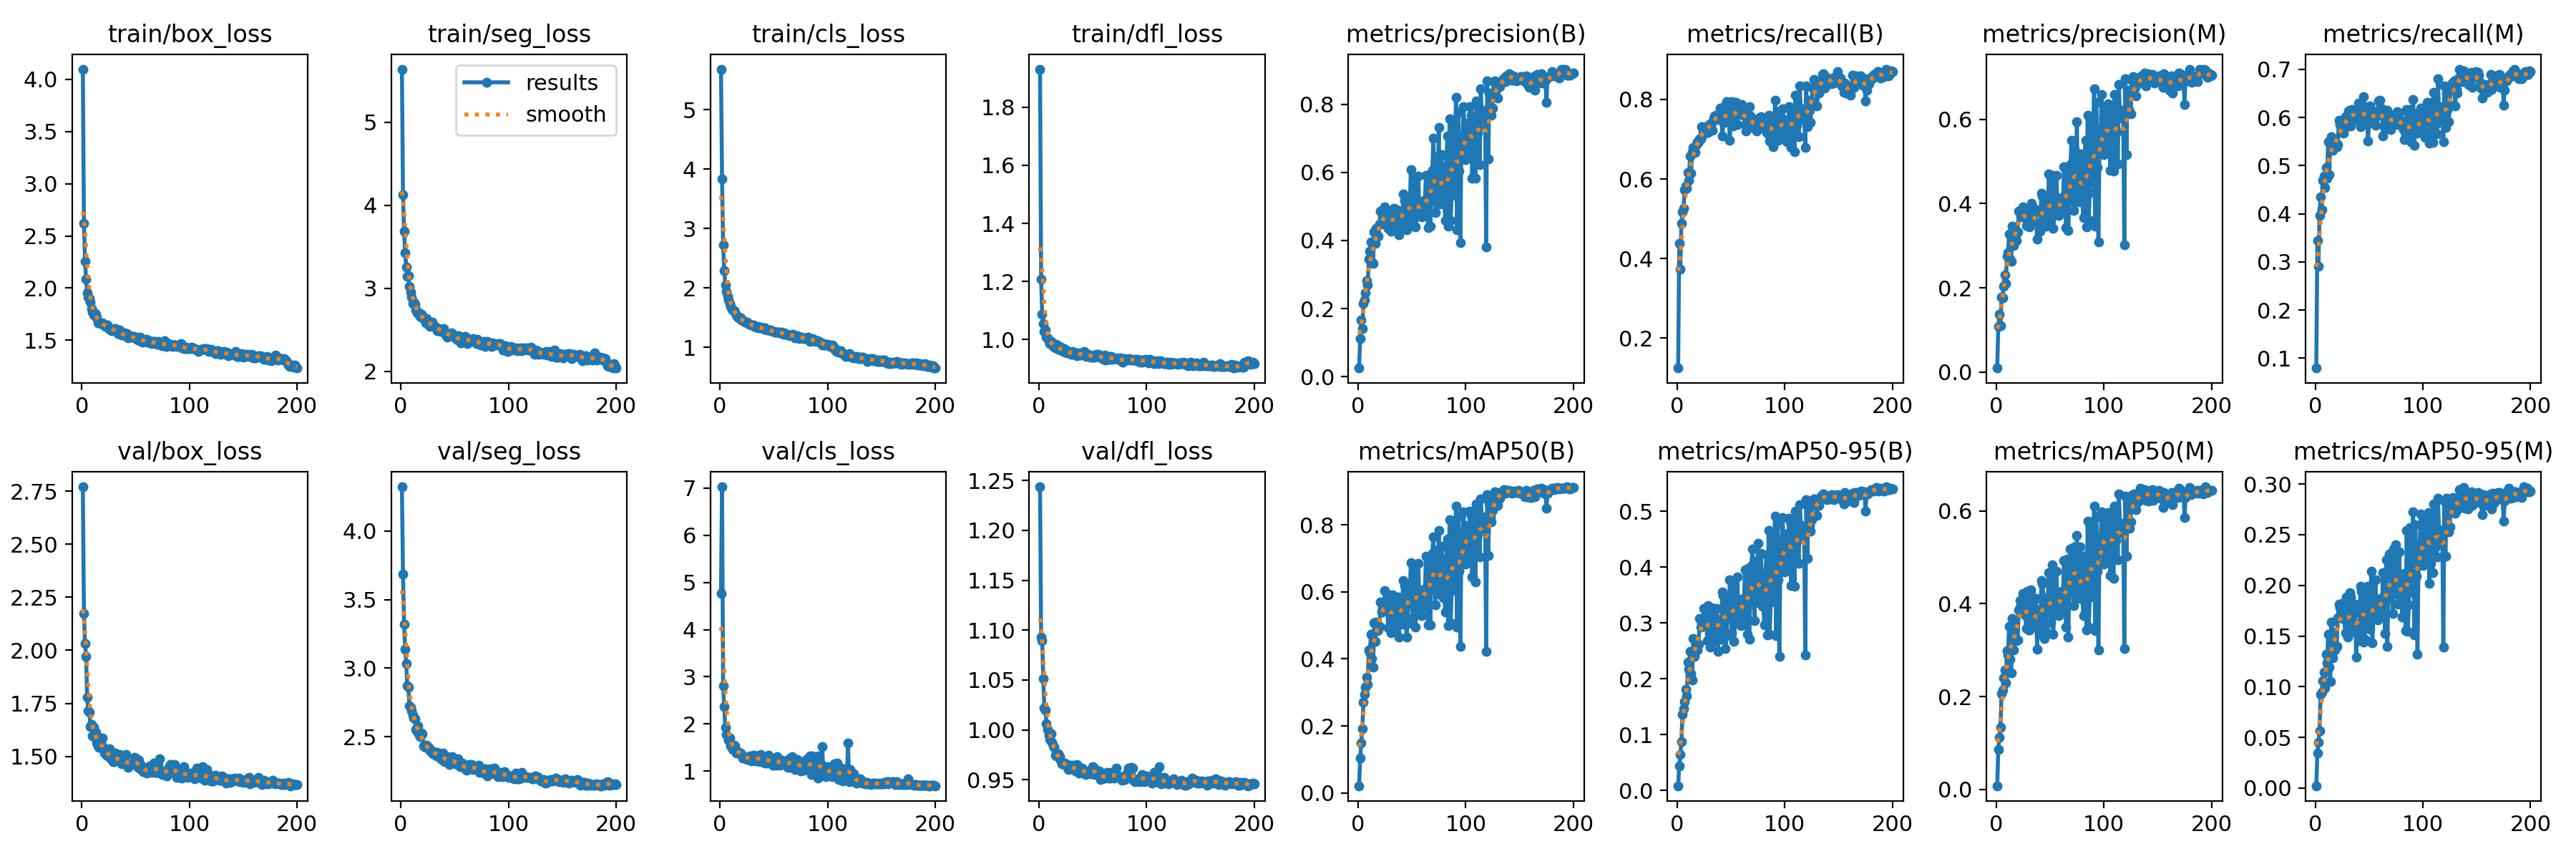

In [15]:
from IPython.display import Image
Image("/kaggle/working/runs/segment/train/results.png")

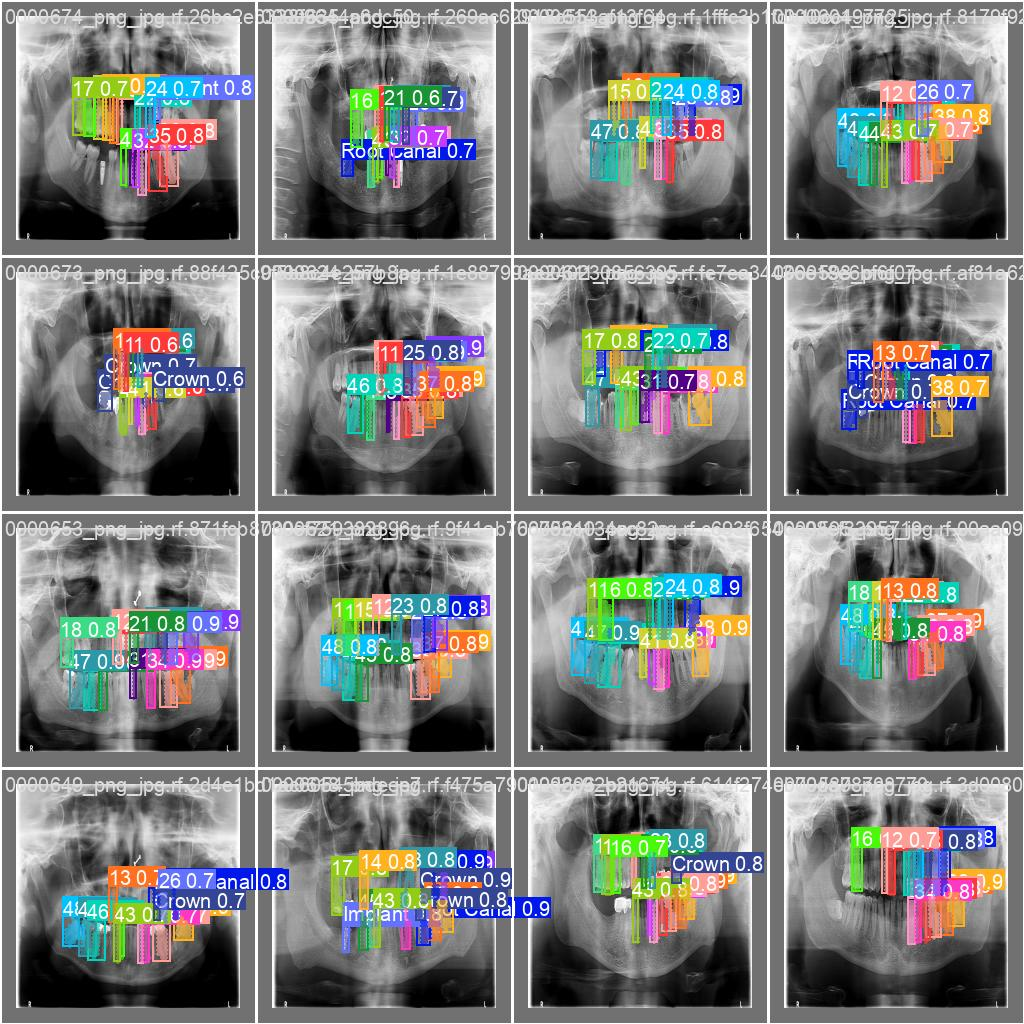

In [16]:
Image("/kaggle/working/runs/segment/train/val_batch1_pred.jpg")

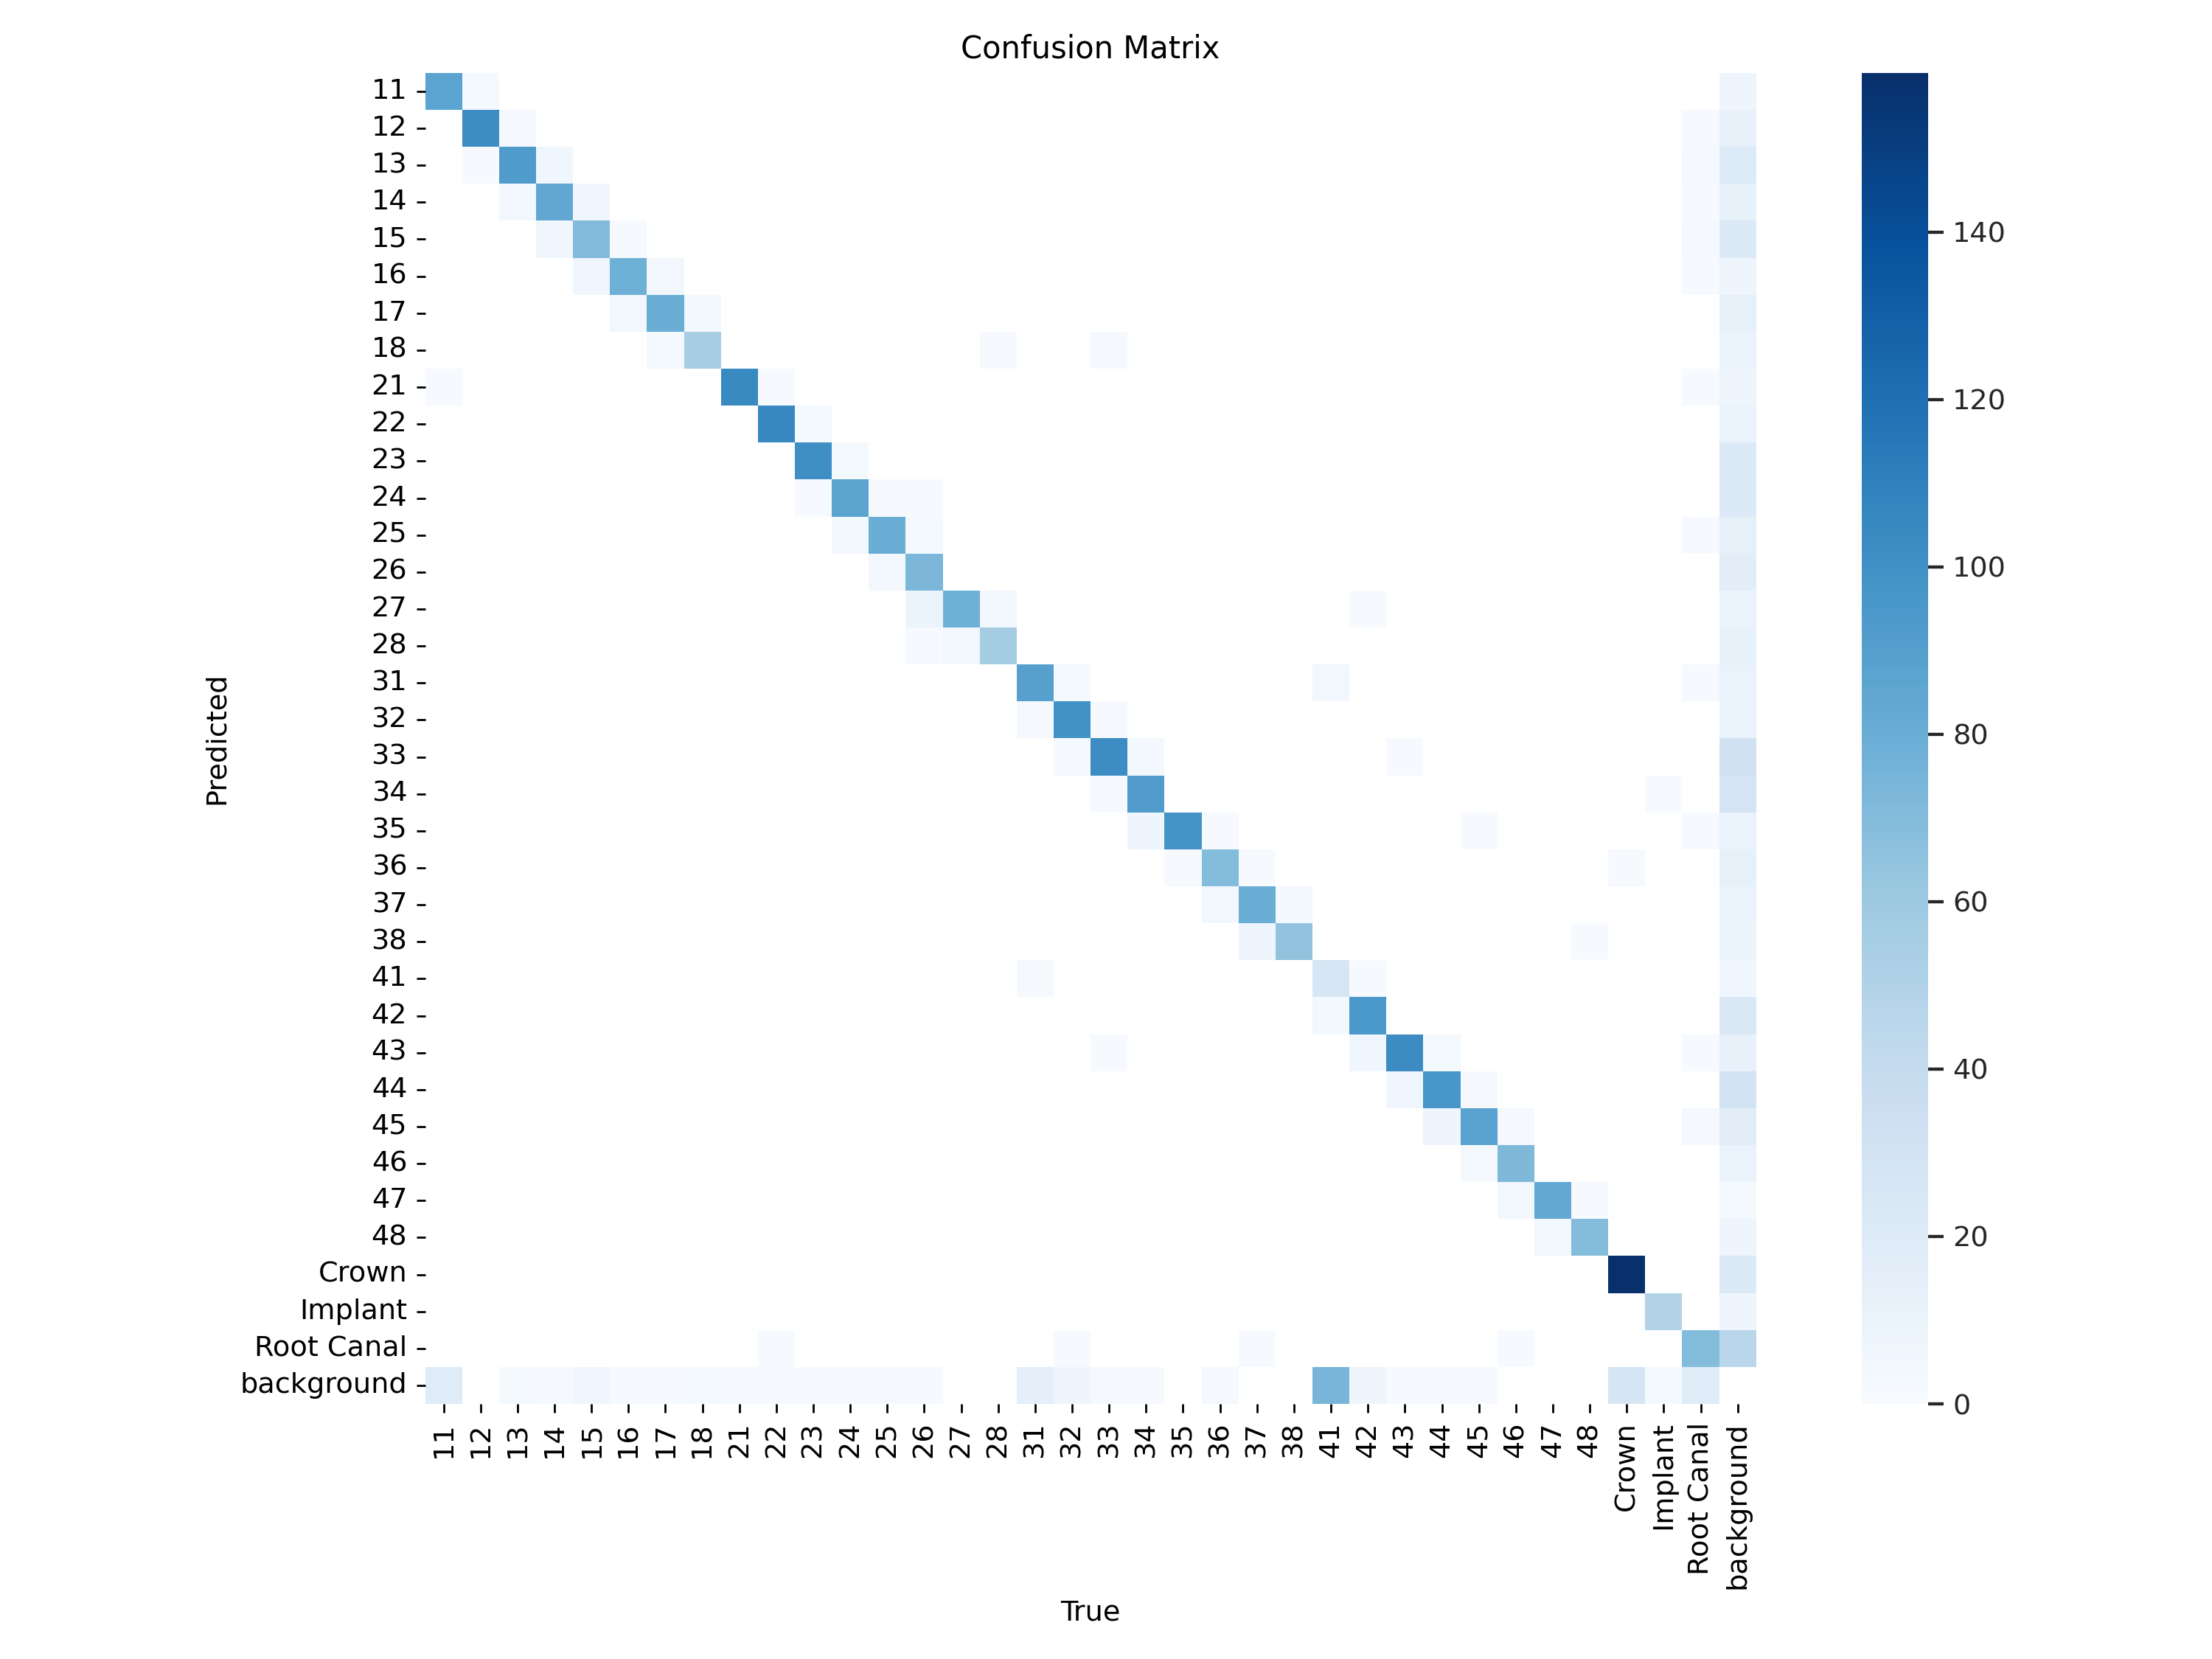

In [17]:
Image("/kaggle/working/runs/segment/train/confusion_matrix.png")